In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("precio_diadm.csv")
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [3]:
#Standardizing the Dataset
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]
# 2. Estandarizar
scaler = StandardScaler()
df_std = scaler.fit_transform(df_numeric)
# 3. Convertir a DataFrame (opcional)
df_std = pd.DataFrame(df_std, columns=numeric_cols)
print(df_std)


          carat     depth     table     price         x         y         z
0     -1.198168 -0.174092 -1.099672 -0.904095 -1.587837 -1.536196 -1.571129
1     -1.240361 -1.360738  1.585529 -0.904095 -1.641325 -1.658774 -1.741175
2     -1.198168 -3.385019  3.375663 -0.903844 -1.498691 -1.457395 -1.741175
3     -1.071587  0.454133  0.242928 -0.902090 -1.364971 -1.317305 -1.287720
4     -1.029394  1.082358  0.242928 -0.901839 -1.240167 -1.212238 -1.117674
...         ...       ...       ...       ...       ...       ...       ...
53935 -0.164427 -0.662711 -0.204605 -0.294731  0.016798  0.022304 -0.054888
53936 -0.164427  0.942753 -1.099672 -0.294731 -0.036690  0.013548  0.100988
53937 -0.206621  0.733344  1.137995 -0.294731 -0.063434 -0.047741  0.030135
53938  0.130927 -0.523105  0.242928 -0.294731  0.373383  0.337506  0.285204
53939 -0.101137  0.314528 -1.099672 -0.294731  0.088115  0.118616  0.143499

[53940 rows x 7 columns]


In [4]:
#PCA
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(df_std) #Fit the model with X and apply the dimensionality reduction on X.
principalDf = pd.DataFrame(data = principalComponents, columns = ['depth', 'table'])

finalDf = pd.concat([principalDf, df[['price']]], axis = 1)
print(finalDf)
print()
print (finalDf.shape)
print()
print(pca2.components_)
print()
print(pca2.explained_variance_)
print()
print(pca2.explained_variance_ratio_)
print()
print(pca2.singular_values_)

          depth     table  price
0     -3.143456  0.410706    326
1     -3.049138 -2.285196    326
2     -2.695226 -4.972220    327
3     -2.627002 -0.008168    334
4     -2.428992  0.466811    335
...         ...       ...    ...
53935 -0.226451 -0.367198   2757
53936 -0.275640  1.424197   2757
53937 -0.142984 -0.246935   2757
53938  0.405843 -0.528711   2757
53939 -0.123915  0.970482   2757

[53940 rows x 3 columns]

(53940, 3)

[[ 0.45244549 -0.00091613  0.09951609  0.42551927  0.45321251  0.4472649
   0.44595366]
 [ 0.03469601  0.73067971 -0.67506738  0.03525794 -0.00351255 -0.00215791
   0.08903518]]

[4.76400313 1.28589192]

[0.68055926 0.18369544]

[506.91770986 263.36234374]


Text(0, 0.5, 'pc2')

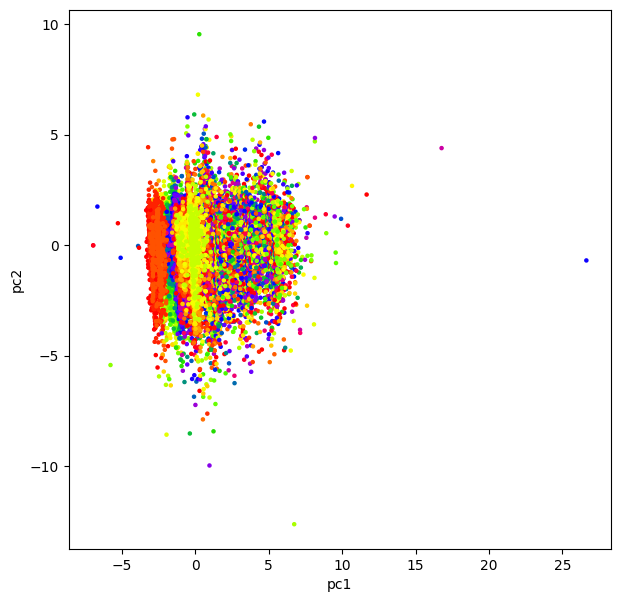

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['depth'],finalDf['table'],c=finalDf['price'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

In [6]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(df_std)

principalDf = pd.DataFrame(data = principalComponents, columns = ['depth', 'table', 'carat'])

finalDf = pd.concat([principalDf, df[['price']]], axis = 1)
print (finalDf)
print()
print (finalDf.shape)
print()
print(pca3.components_)
print()
print(pca3.explained_variance_)
print()
print(pca3.explained_variance_ratio_)
print()
print(pca3.singular_values_)

          depth     table     carat  price
0     -3.143456  0.410706 -0.732095    326
1     -3.049138 -2.285196  0.426760    326
2     -2.695226 -4.972220  0.351300    327
3     -2.627002 -0.008168  0.657749    334
4     -2.428992  0.466811  1.076289    335
...         ...       ...       ...    ...
53935 -0.226451 -0.367198 -0.566921   2757
53936 -0.275640  1.424197 -0.129628   2757
53937 -0.142984 -0.246935  1.360456   2757
53938  0.405843 -0.528711 -0.166478   2757
53939 -0.123915  0.970482 -0.561605   2757

[53940 rows x 4 columns]

(53940, 4)

[[ 0.45244549 -0.00091613  0.09951609  0.42551927  0.45321251  0.4472649
   0.44595366]
 [ 0.03469601  0.73067971 -0.67506738  0.03525794 -0.00351255 -0.00215791
   0.08903518]
 [-0.00549481  0.67282929  0.72806947 -0.10544948 -0.03950882 -0.05418879
   0.03960344]]

[4.76400313 1.28589192 0.69082407]

[0.68055926 0.18369544 0.09868732]

[506.91770986 263.36234374 193.03460713]


Text(0, 0.5, 'pc2')

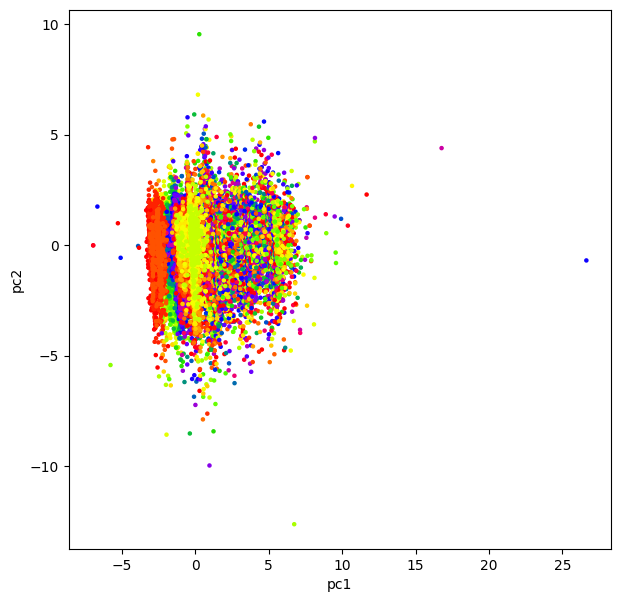

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['depth'],finalDf['table'],c=finalDf['price'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

In [8]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(df_std)

principalDf = pd.DataFrame(data = principalComponents, columns = ['depth', 'table', 'carat'])

finalDf = pd.concat([principalDf, df[['price']]], axis = 1)
print (finalDf.head())
print (finalDf.shape)
print(pca3.components_)
print(pca3.explained_variance_)
print(pca3.explained_variance_ratio_)
print(pca3.singular_values_)

      depth     table     carat  price
0 -3.143456  0.410706 -0.732095    326
1 -3.049138 -2.285196  0.426760    326
2 -2.695226 -4.972220  0.351300    327
3 -2.627002 -0.008168  0.657749    334
4 -2.428992  0.466811  1.076289    335
(53940, 4)
[[ 0.45244549 -0.00091613  0.09951609  0.42551927  0.45321251  0.4472649
   0.44595366]
 [ 0.03469601  0.73067971 -0.67506738  0.03525794 -0.00351255 -0.00215791
   0.08903518]
 [-0.00549481  0.67282929  0.72806947 -0.10544948 -0.03950882 -0.05418879
   0.03960344]]
[4.76400313 1.28589192 0.69082407]
[0.68055926 0.18369544 0.09868732]
[506.91770986 263.36234374 193.03460713]


In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(9,9), clear=True)
axes = Axes3D(fig2)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['depth'],finalDf['table'],finalDf['carat'],c=finalDf['price'], cmap = 'prism', s=10)
plt.show()

<Figure size 900x900 with 0 Axes>